In [164]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print(ccxt.exchanges) # print a list of all available exchange classes

from datetime import datetime
from datetime import timedelta

['_1broker', '_1btcxe', 'anxpro', 'binance', 'bit2c', 'bitbay', 'bitbays', 'bitcoincoid', 'bitfinex', 'bitflyer', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp', 'bittrex', 'bl3p', 'btcchina', 'btce', 'btcexchange', 'btcmarkets', 'btctradeua', 'btcturk', 'btcx', 'bter', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'coincheck', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinsecure', 'coinspot', 'cryptopia', 'dsx', 'exmo', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gdax', 'gemini', 'hitbtc', 'huobi', 'itbit', 'jubi', 'kraken', 'lakebtc', 'livecoin', 'liqui', 'luno', 'mercado', 'okcoincny', 'okcoinusd', 'okex', 'paymium', 'poloniex', 'quadrigacx', 'quoine', 'southxchange', 'surbitcoin', 'therock', 'urdubit', 'vaultoro', 'vbtc', 'virwox', 'xbtce', 'yobit', 'yunbi', 'zaif']


In [2]:
coincheck = ccxt.coincheck()
zaif = ccxt.zaif()
bitflyer = ccxt.bitflyer()
quoine = ccxt.quoine()

In [ ]:
i = 0
trade_dict={}
while True:
    i += 1
    if i %100 == 0:
        print(i)
    trades=coincheck.fetchTrades("BTC/JPY")
    for trade in trades:
        trade_dict[trade["id"]] = trade

trade_list = []
for key, trade in trade_dict.items():
    trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
df_trade=pd.DataFrame(trade_list)
df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)


In [151]:
df_trade=pd.read_csv("./coincheck_0826_2.csv")

In [166]:
df_trade["created_at"]=df_trade["created_at"]+ timedelta(hours=8)
df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)
df_trade.index=df_trade["created_at"]
df_trade=df_trade.sort_values('created_at')
df_trade_amount=df_trade[["amount"]]

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [167]:
df_trade.head()

,created_at,coincheck,id,created_at.1,amount,order_type,rate
created_at,,,,,,,
2017-08-26 16:21:30,2017-08-26 16:21:30,coincheck,16480030,2017-08-26 06:21:30,0.0078,sell,472677
2017-08-26 16:21:30,2017-08-26 16:21:30,coincheck,16480029,2017-08-26 06:21:30,0.0051,sell,472730
2017-08-26 16:21:35,2017-08-26 16:21:35,coincheck,16480032,2017-08-26 06:21:35,0.0020,sell,472686
2017-08-26 16:21:35,2017-08-26 16:21:35,coincheck,16480031,2017-08-26 06:21:35,0.0270,sell,472698
2017-08-26 16:21:38,2017-08-26 16:21:38,coincheck,16480033,2017-08-26 06:21:38,0.0100,buy,472754


In [168]:
len(df_trade)

5287

In [169]:
# 秒ごとに集計
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]

In [170]:
df_summary

,amount
created_at,
2017-08-26 16:22:00,0.880368
2017-08-26 16:23:00,2.464232
2017-08-26 16:24:00,11.270953
2017-08-26 16:25:00,10.314184
2017-08-26 16:26:00,14.630704
2017-08-26 16:27:00,12.413288
2017-08-26 16:28:00,19.163284
2017-08-26 16:29:00,6.160827
2017-08-26 16:30:00,15.736150


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

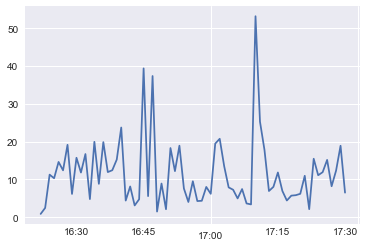

In [171]:
df_summary.plot()